In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [266]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [267]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')

In [268]:
df=pd.concat([train_df,test_df])
df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555.0,31/12/18,Athens,37.97945,23.71622,664046.0,shop_1,kinder-cola,plastic,1.5lt,2.52,13760.0
1076,7556.0,31/12/18,Athens,37.97945,23.71622,664046.0,shop_1,orange-power,plastic,1.5lt,2.18,16309.0
1077,7557.0,31/12/18,Patra,38.24444,21.73444,168034.0,shop_6,kinder-cola,can,330ml,0.85,24378.0
1078,7558.0,31/12/18,Thessaloniki,40.64361,22.93086,354290.0,shop_4,adult-cola,plastic,1.5lt,2.17,20691.0


In [269]:
df.shape

(8640, 12)

In [270]:
train_df.shape,test_df.shape

((7560, 12), (1080, 12))

In [271]:
train_df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [272]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         6480 non-null   float64
 1   date       6480 non-null   object 
 2   city       6480 non-null   object 
 3   lat        6429 non-null   float64
 4   long       6434 non-null   float64
 5   pop        6480 non-null   float64
 6   shop       6480 non-null   object 
 7   brand      6480 non-null   object 
 8   container  6464 non-null   object 
 9   capacity   6465 non-null   object 
 10  price      6480 non-null   float64
 11  quantity   6480 non-null   float64
dtypes: float64(6), object(6)
memory usage: 708.9+ KB


In [273]:
test_df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,6480,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,3.10,7056
1,6481,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330ml,0.85,12490
2,6482,31/01/18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500ml,0.83,26640
3,6483,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500ml,0.54,41892
4,6484,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,0.83,22923
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555,31/12/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,2.52,13760
1076,7556,31/12/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,2.18,16309
1077,7557,31/12/18,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,330ml,0.85,24378
1078,7558,31/12/18,Thessaloniki,40.64361,22.93086,354290,shop_4,adult-cola,plastic,1.5lt,2.17,20691


In [274]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1080 non-null   int64  
 1   date       1080 non-null   object 
 2   city       1080 non-null   object 
 3   lat        1072 non-null   float64
 4   long       1067 non-null   float64
 5   pop        1080 non-null   int64  
 6   shop       1080 non-null   object 
 7   brand      1080 non-null   object 
 8   container  1077 non-null   object 
 9   capacity   1076 non-null   object 
 10  price      1080 non-null   float64
 11  quantity   1080 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 101.4+ KB


In [275]:
df.describe()

,id,lat,long,pop,price,quantity
count,7560.00000,7501.000000,7501.000000,7560.000000,7560.000000,7560.000000
mean,3779.50000,38.300808,23.270191,355174.095238,1.196049,29421.715212
std,2182.52835,1.650503,1.087175,232441.012350,0.816838,17665.033867
min,0.00000,35.327870,21.734440,134219.000000,0.110000,2953.000000
25%,1889.75000,37.962450,22.417610,141732.000000,0.620000,16572.750000
50%,3779.50000,38.244440,22.930860,257501.500000,0.930000,25312.000000
75%,5669.25000,39.636890,23.716220,665102.000000,1.510000,37751.500000
max,7559.00000,40.643610,25.143410,672130.000000,4.790000,145287.000000


In [276]:
df.isna().sum()

id           1080
date         1080
city         1080
lat          1139
long         1139
pop          1080
shop         1080
brand        1080
container    1099
capacity     1099
price        1080
quantity     1080
dtype: int64

Preprocessing

In [277]:
df = df.drop(df[df['id'].isna()].index, axis = 0)
df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555.0,31/12/18,Athens,37.97945,23.71622,664046.0,shop_1,kinder-cola,plastic,1.5lt,2.52,13760.0
1076,7556.0,31/12/18,Athens,37.97945,23.71622,664046.0,shop_1,orange-power,plastic,1.5lt,2.18,16309.0
1077,7557.0,31/12/18,Patra,38.24444,21.73444,168034.0,shop_6,kinder-cola,can,330ml,0.85,24378.0
1078,7558.0,31/12/18,Thessaloniki,40.64361,22.93086,354290.0,shop_4,adult-cola,plastic,1.5lt,2.17,20691.0


In [278]:
df.isna().sum()

id            0
date          0
city          0
lat          59
long         59
pop           0
shop          0
brand         0
container    19
capacity     19
price         0
quantity      0
dtype: int64

In [279]:
df['container'] = df['container'].fillna(df['container'].mode()[0])
df['capacity'] = df['capacity'].fillna(df['capacity'].mode()[0])

In [280]:
df.isna().sum()

id            0
date          0
city          0
lat          59
long         59
pop           0
shop          0
brand         0
container     0
capacity      0
price         0
quantity      0
dtype: int64

In [281]:
df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555.0,31/12/18,Athens,37.97945,23.71622,664046.0,shop_1,kinder-cola,plastic,1.5lt,2.52,13760.0
1076,7556.0,31/12/18,Athens,37.97945,23.71622,664046.0,shop_1,orange-power,plastic,1.5lt,2.18,16309.0
1077,7557.0,31/12/18,Patra,38.24444,21.73444,168034.0,shop_6,kinder-cola,can,330ml,0.85,24378.0
1078,7558.0,31/12/18,Thessaloniki,40.64361,22.93086,354290.0,shop_4,adult-cola,plastic,1.5lt,2.17,20691.0


**Graph** **Based** **Analysis**

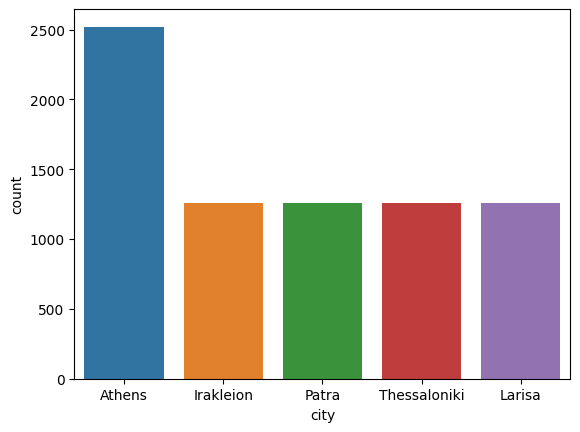

In [282]:
sns.countplot(x = 'city', data = df)
plt.show()

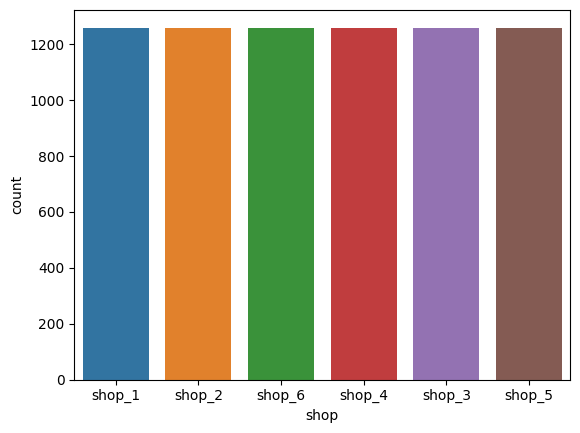

In [283]:
sns.countplot(x = 'shop', data = df)
plt.show()

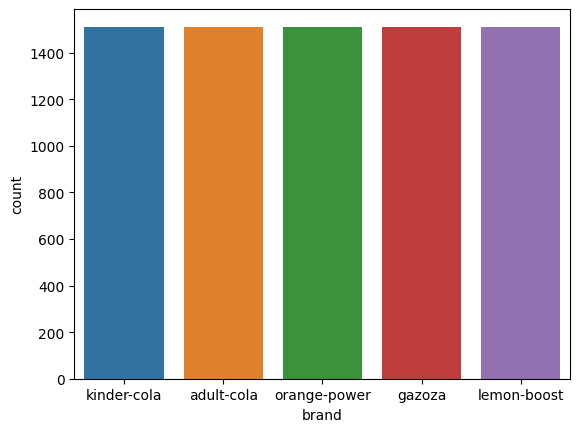

In [284]:
sns.countplot(x = 'brand', data = df)
plt.show()

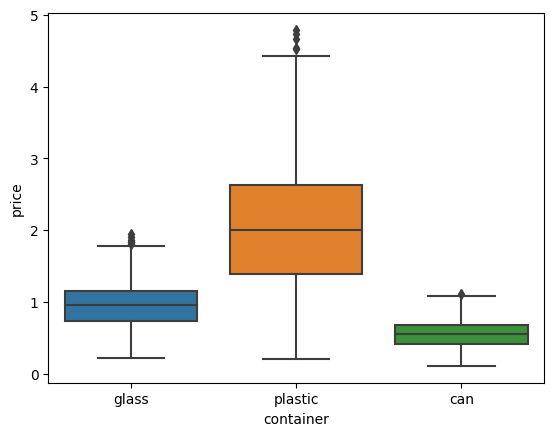

In [285]:
sns.boxplot(x = 'container',y ='price', data = df)
plt.show()

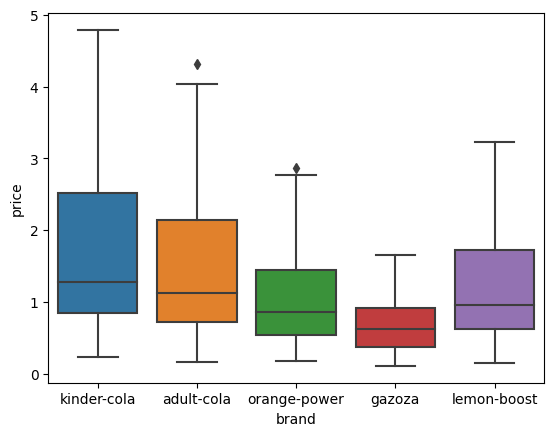

In [286]:
sns.boxplot(x = 'brand',y ='price', data = df)
plt.show()

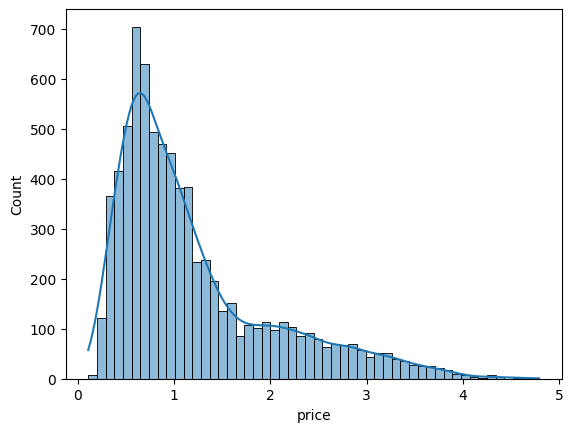

In [287]:
sns.histplot(x='price',kde = True ,data = df)
plt.show()

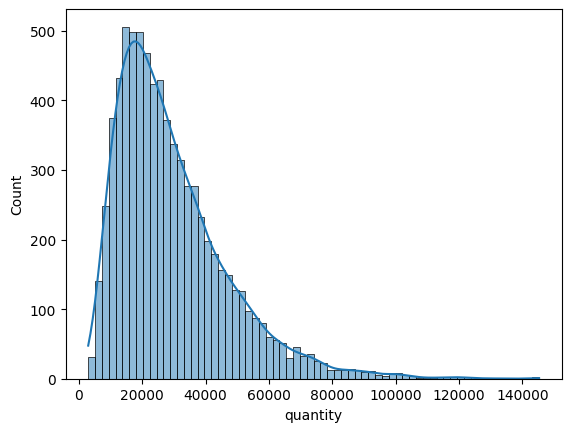

In [288]:
sns.histplot(x='quantity',kde = True ,data = df)
plt.show()

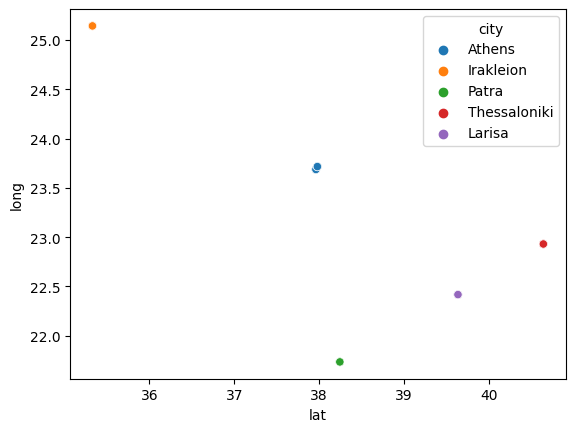

In [289]:
sns.scatterplot(x = 'lat', y= 'long', hue = 'city',data = df)
plt.show()

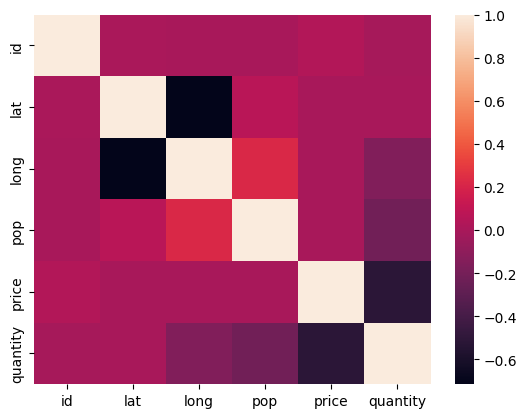

In [290]:
sns.heatmap(df.corr())
plt.show()

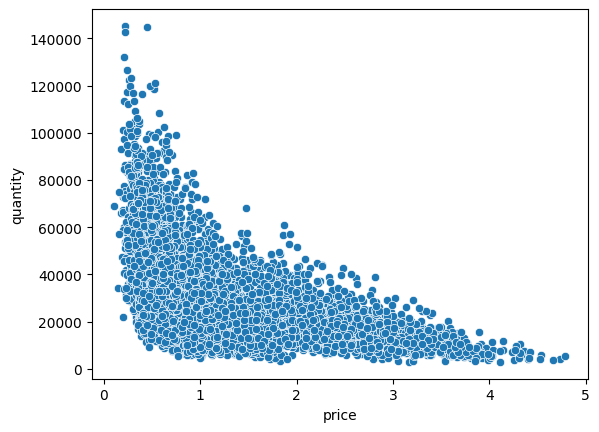

In [291]:
sns.scatterplot(x = 'price', y= 'quantity', data = df)
plt.show()

<Axes: >

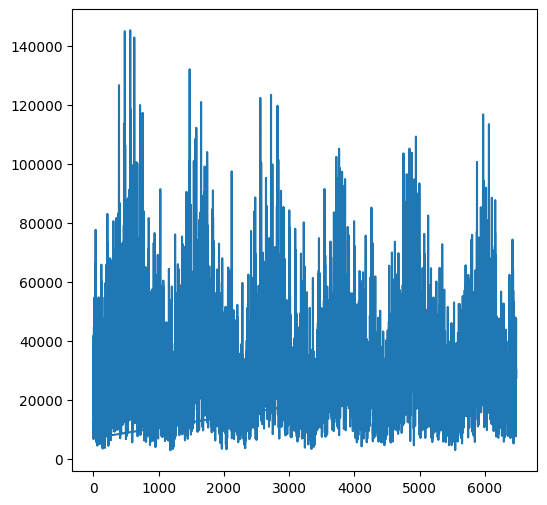

In [292]:
df['quantity'].plot(figsize=(6,6))

In [293]:
df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555.0,31/12/18,Athens,37.97945,23.71622,664046.0,shop_1,kinder-cola,plastic,1.5lt,2.52,13760.0
1076,7556.0,31/12/18,Athens,37.97945,23.71622,664046.0,shop_1,orange-power,plastic,1.5lt,2.18,16309.0
1077,7557.0,31/12/18,Patra,38.24444,21.73444,168034.0,shop_6,kinder-cola,can,330ml,0.85,24378.0
1078,7558.0,31/12/18,Thessaloniki,40.64361,22.93086,354290.0,shop_4,adult-cola,plastic,1.5lt,2.17,20691.0


In [294]:
df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555.0,31/12/18,Athens,37.97945,23.71622,664046.0,shop_1,kinder-cola,plastic,1.5lt,2.52,13760.0
1076,7556.0,31/12/18,Athens,37.97945,23.71622,664046.0,shop_1,orange-power,plastic,1.5lt,2.18,16309.0
1077,7557.0,31/12/18,Patra,38.24444,21.73444,168034.0,shop_6,kinder-cola,can,330ml,0.85,24378.0
1078,7558.0,31/12/18,Thessaloniki,40.64361,22.93086,354290.0,shop_4,adult-cola,plastic,1.5lt,2.17,20691.0


In [295]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'Shop' column
label_encoder = LabelEncoder()
df['Shop_encoded'] = label_encoder.fit_transform(df['shop'])

# Display the DataFrame with encoded values
print(df)


          id      date          city       lat      long       pop    shop  \
0        0.0  31/01/12        Athens  37.97945  23.71622  672130.0  shop_1   
1        1.0  31/01/12        Athens  37.97945  23.71622  672130.0  shop_1   
2        2.0  31/01/12        Athens  37.97945  23.71622  672130.0  shop_1   
3        3.0  31/01/12        Athens  37.97945  23.71622  672130.0  shop_1   
4        4.0  31/01/12        Athens  37.97945  23.71622  672130.0  shop_1   
...      ...       ...           ...       ...       ...       ...     ...   
1075  7555.0  31/12/18        Athens  37.97945  23.71622  664046.0  shop_1   
1076  7556.0  31/12/18        Athens  37.97945  23.71622  664046.0  shop_1   
1077  7557.0  31/12/18         Patra  38.24444  21.73444  168034.0  shop_6   
1078  7558.0  31/12/18  Thessaloniki  40.64361  22.93086  354290.0  shop_4   
1079  7559.0  31/12/18     Irakleion  35.32787  25.14341  137154.0  shop_2   

             brand container capacity  price  quantity  Shop_en

Nested **CV**

In [296]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

class NestedTimeSeriesCV:
    def __init__(self, n_splits_outer=5, n_splits_inner=5):
        self.n_splits_outer = n_splits_outer
        self.n_splits_inner = n_splits_inner
        self.outer_cv = TimeSeriesSplit(n_splits=n_splits_outer)
        self.inner_cv = TimeSeriesSplit(n_splits=n_splits_inner)

    def split(self, X, y):
        for train_outer_idx, test_outer_idx in self.outer_cv.split(X):
            train_outer, test_outer = X.iloc[train_outer_idx], X.iloc[test_outer_idx]
            y_train_outer, y_test_outer = y.iloc[train_outer_idx], y.iloc[test_outer_idx]

            for train_inner_idx, val_inner_idx in self.inner_cv.split(train_outer):
                train_inner, val_inner = train_outer.iloc[train_inner_idx], train_outer.iloc[val_inner_idx]
                y_train_inner, y_val_inner = y_train_outer.iloc[train_inner_idx], y_train_outer.iloc[val_inner_idx]

                yield train_inner.index, val_inner.index, test_outer.index

# Sort the DataFrame by Date
df.sort_values('date', inplace=True)

# Feature engineering: Extract day, month, and year as separate columns
df['date'] = pd.to_datetime(df['date'])
df['Day'] = df['date'].dt.day
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

# Define features and target
X = df[['Shop_encoded','Day', 'Month', 'Year']]
y = df['quantity']

# Create a NestedTimeSeriesCV
ntscv = NestedTimeSeriesCV(n_splits_outer=5, n_splits_inner=5)

# Store RMSE values for each fold
rmse_values = []

# Example: Iterate through the splits and train/evaluate the model
for train_idx, val_idx, test_idx in ntscv.split(X, y):
    x_train, x_val, x_test = X.iloc[train_idx], X.iloc[val_idx], X.iloc[test_idx]
    y_train, y_val, y_test = y.iloc[train_idx], y.iloc[val_idx], y.iloc[test_idx]

    # Train and evaluate the model
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Calculate RMSE
    rmse = sqrt(mean_squared_error(y_test, y_pred))

    print(f'Fold RMSE: {rmse}')
    rmse_values.append(rmse)
    print('-' * 50)

# Calculate and print the average RMSE across all folds
avg_rmse = np.mean(rmse_values)
print(f'Average RMSE across all folds: {avg_rmse}')


Fold RMSE: 461780592344274.7
--------------------------------------------------
Fold RMSE: 18657.72502802618
--------------------------------------------------
Fold RMSE: 18089.964755022276
--------------------------------------------------
Fold RMSE: 18409.75802812517
--------------------------------------------------
Fold RMSE: 18386.435909751403
--------------------------------------------------
Fold RMSE: 17038.59537696275
--------------------------------------------------
Fold RMSE: 17365.445721042994
--------------------------------------------------
Fold RMSE: 16980.670220853426
--------------------------------------------------
Fold RMSE: 16551.736336455546
--------------------------------------------------
Fold RMSE: 16550.460434048713
--------------------------------------------------
Fold RMSE: 16866.578649423303
--------------------------------------------------
Fold RMSE: 16870.501904435703
--------------------------------------------------
Fold RMSE: 16832.665895075006
--

# Training

In [297]:
models = {
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                     Linear Regression": LinearRegression(),
    "                 Ridge (L2) Regression": Ridge(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                        Neural Network": MLPRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(name + " trained.")

                   K-Nearest Neighbors trained.
                     Linear Regression trained.
                 Ridge (L2) Regression trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                         Decision Tree trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.


# Results

In [298]:
for name, model in models.items():
  print(name + " R^2: {:.5f}".format(model.score(x_test, y_test)))

                   K-Nearest Neighbors R^2: 0.17259
                     Linear Regression R^2: 0.04360
                 Ridge (L2) Regression R^2: 0.04360
Support Vector Machine (Linear Kernel) R^2: -0.15030
   Support Vector Machine (RBF Kernel) R^2: -0.14270
                         Decision Tree R^2: 0.29817
                        Neural Network R^2: -0.00903
                         Random Forest R^2: 0.30409
                     Gradient Boosting R^2: 0.31353


**Neural** **Network** Model is consider as Final model(RMSC score)